In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Histograms, Binnings, and Density

In [3]:
plt.style.use('seaborn-whitegrid')

In [4]:
data=np.random.randn(1000)

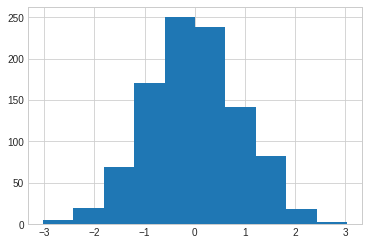

In [7]:
plt.hist(data);

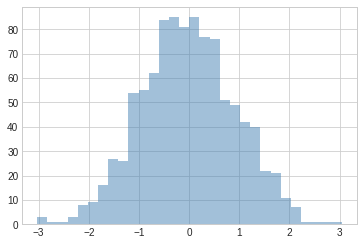

In [12]:
plt.hist(data, bins=30, alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');

# comparing histograms of several distributions

In [13]:
x1=np.random.normal(0,0.8,1000)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)

In [16]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

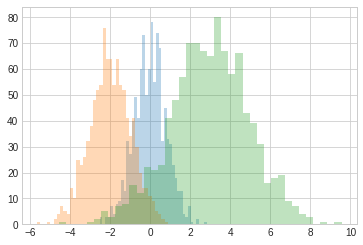

In [18]:
plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs);

If you would like to simply compute the histogram (that is, count the number of
points in a given bin) and not display it, the np.histogram() function is available

In [19]:
counts, bin_edges = np.histogram(data, bins=5)

In [20]:
counts

array([ 25, 240, 488, 225,  22])

In [21]:
bin_edges

array([-3.02890311, -1.815253  , -0.60160289,  0.61204722,  1.82569734,
        3.03934745])

# Customizing Plot Legends

In [22]:
plt.style.use('classic')

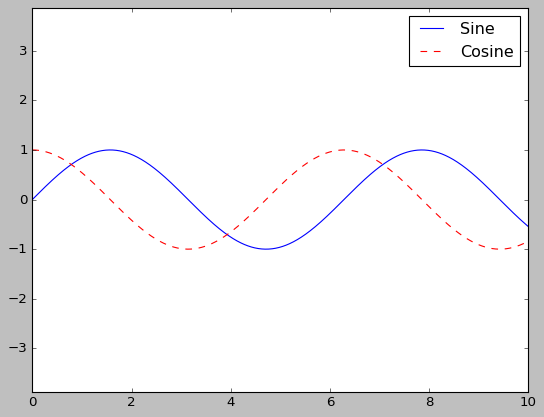

In [23]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But there are many ways we might want to customize such a legend. For example, we
can specify the location and turn off the frame

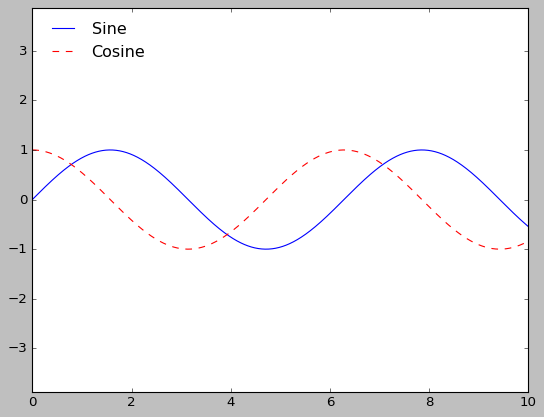

In [24]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the ncol command to specify the number of columns in the legend

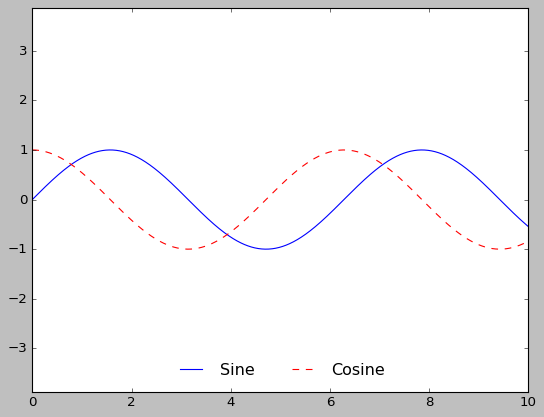

In [25]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box ( fancybox ) or add a shadow, change the transparency
(alpha value) of the frame, or change the padding around the text

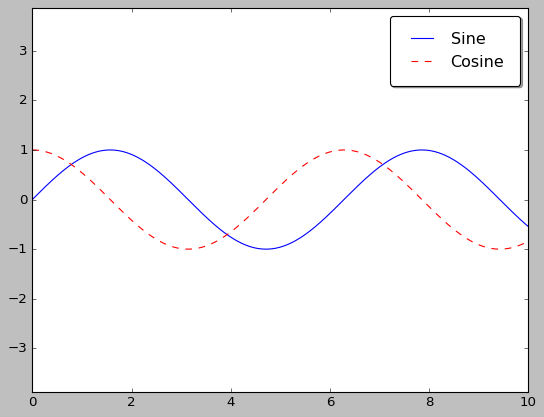

In [26]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end,
Matplotlib has the concept of subplots: groups of smaller axes that can exist together
within a single figure. These subplots might be insets, grids of plots, or other more
complicated layouts.

In [30]:
plt.style.use('seaborn-white')

plt.axes: Subplots by Hand
The most basic method of creating an axes is to use the plt.axes function. As we’ve
seen previously, by default this creates a standard axes object that fills the entire fig‐
ure. plt.axes also takes an optional argument that is a list of four numbers in the
figure coordinate system. These numbers represent [bottom, left, width,
height] in the figure coordinate system, which ranges from 0 at the bottom left of the
figure to 1 at the top right of the figure.
For example, we might create an inset axes at the top-right corner of another axes by
setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of
the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is
20% of the width and 20% of the height of the figure). Figure 4-59 shows the result of
this code:

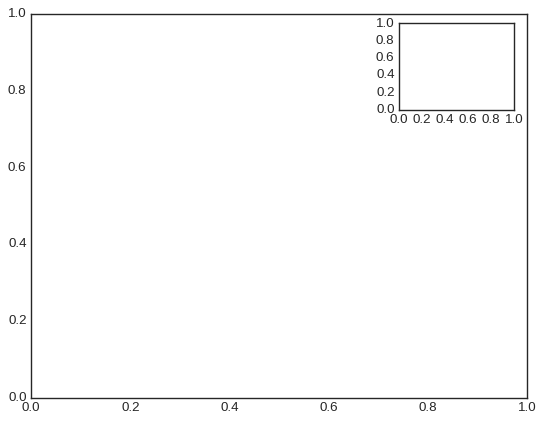

In [34]:
ax1=plt.axes()
ax2=plt.axes([0.7,0.7,0.18,0.18])

The equivalent of this command within the object-oriented interface is
fig.add_axes() . Let’s use this to create two vertically stacked axes

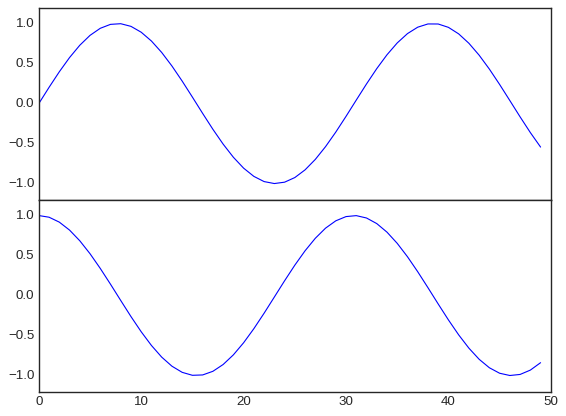

In [35]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

# plt.subplot: Simple Grids of Subplots

Aligned columns or rows of subplots are a common enough need that Matplotlib has
several convenience routines that make them easy to create. The lowest level of these
is plt.subplot() , which creates a single subplot within a grid. As you can see, this
command takes three integer arguments—the number of rows, the number of col‐
umns, and the index of the plot to be created in this scheme, which runs from the
upper left to the bottom right

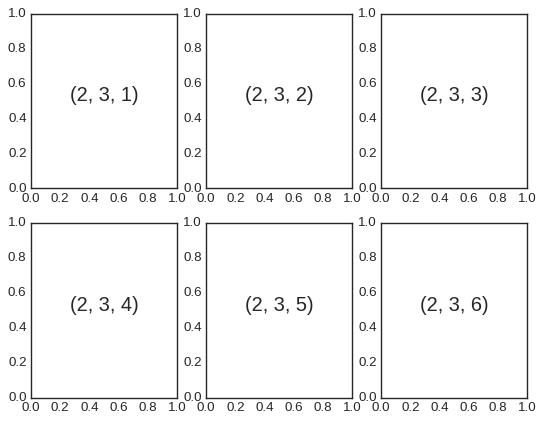

In [36]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
    fontsize=18, ha='center')

The command plt.subplots_adjust can be used to adjust the spacing between
these plots.

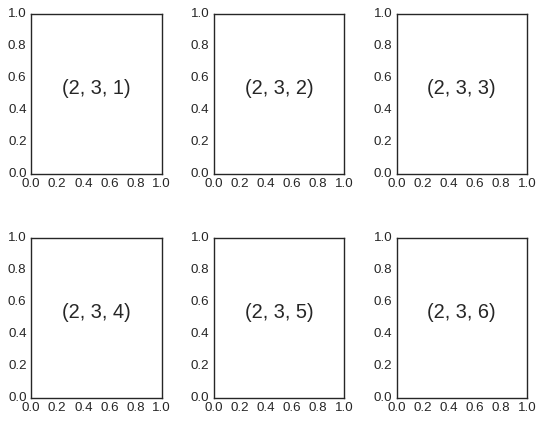

In [38]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
    fontsize=18, ha='center')

We’ve used the hspace and wspace arguments of plt.subplots_adjust , which specify the spacing along the height and width of the figure, in units of the subplot size (in
this case, the space is 40% of the subplot width and height).

The approach just described can become quite tedious when you’re creating a large
grid of subplots, especially if you’d like to hide the x- and y-axis labels on the inner
plots. For this purpose, plt.subplots() is the easier tool to use (note the s at the end
of subplots ). Rather than creating a single subplot, this function creates a full grid of
subplots in a single line, returning them in a NumPy array. The arguments are the
number of rows and number of columns, along with optional keywords sharex and
sharey , which allow you to specify the relationships between different axes.
Here we’ll create a 2×3 grid of subplots, where all axes in the same row share their
y-axis scale, and all axes in the same column share their x-axis scale

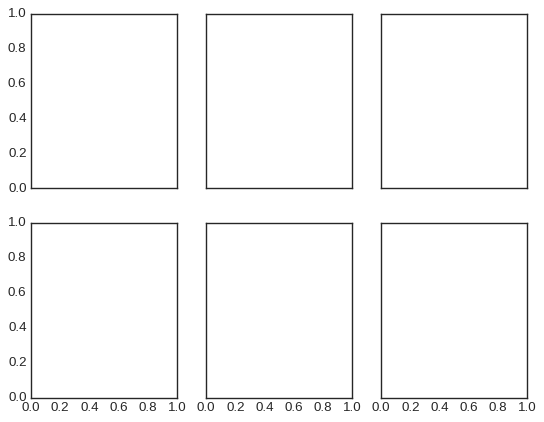

In [39]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying sharex and sharey , we’ve automatically removed inner labels
on the grid to make the plot cleaner. The resulting grid of axes instances is returned
within a NumPy array, allowing for convenient specification of the desired axes using
standard array indexing notation

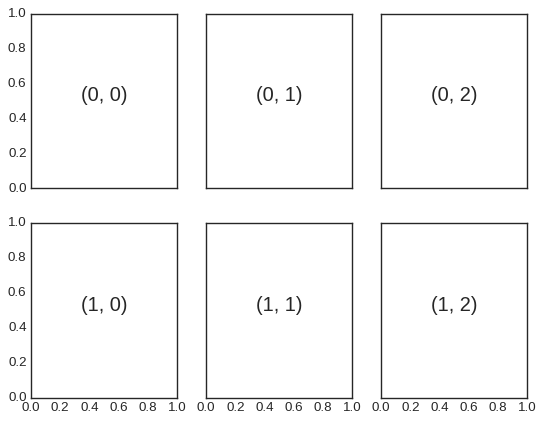

In [40]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
        fontsize=18, ha='center')
fig

# plt.GridSpec: More Complicated Arrangements
To go beyond a regular grid to subplots that span multiple rows and columns,
plt.GridSpec() is the best tool. The plt.GridSpec() object does not create a plot by

itself; it is simply a convenient interface that is recognized by the plt.subplot()
command. For example, a gridspec for a grid of two rows and three columns with
some specified width and height space looks like this:

In [41]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

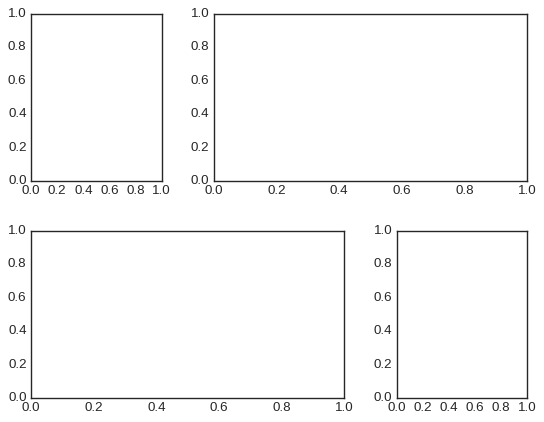

In [42]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])
                 

# Thank You